In [67]:

import re

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
# Import necessary libraries

from sklearn.metrics import accuracy_score, classification_report

from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import numpy as np

In [68]:
import keras
#import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
tf.config.run_functions_eagerly(True)

from keras.models import Sequential
from keras.layers import Dense, InputLayer, Dropout, Conv2D, MaxPooling2D, Flatten, Embedding, LSTM, GRU, RNN
from keras.utils import to_categorical, set_random_seed, pad_sequences
from keras.callbacks import EarlyStopping

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [69]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Get the current working directory
current_dir = os.getcwd()


# Read the data file into a Pandas DataFrame
df = pd.read_csv('/Users/blankajarmoszko/PycharmProjects/thesis/data/df_cleaned.csv')

In [70]:
df.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo..."
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e..."
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do..."
3,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar"
4,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba..."


Number of rows per star rating:
sentiment
2    17996
1    14874
0    13876
Name: count, dtype: int64


/var/folders/66/n0_9mny57ys5rqmlmylz_2880000gn/T/ipykernel_7415/3462290488.py:16: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df['sentiment']).plot.bar(title="Sentiment distribution in df")


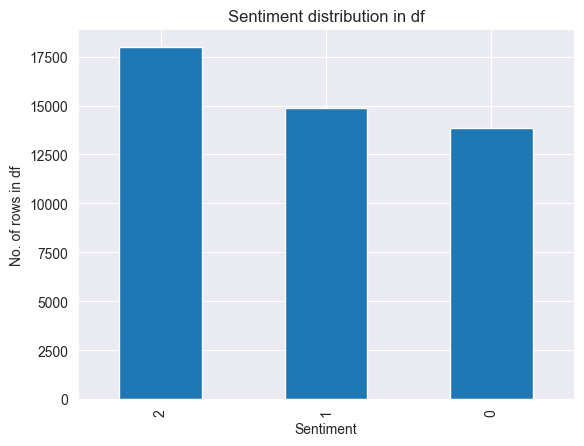

In [71]:
# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 3:
        return 0
    elif stars_received <= 4:
        return 1
    else:
        return 2
# Mapping stars to sentiment into three categories
df['sentiment'] = [ map_sentiment(x) for x in df['star_rating']]
print("Number of rows per star rating:")
print(df['sentiment'].value_counts())

# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [72]:
df.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo..."
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e..."
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do..."
3,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar"
4,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba..."


In [73]:
# Drop rows with NaN values in the 'cleaned_text' column
df = df.dropna(subset=['cleaned_text'])

# Reset index after removing rows
df.reset_index(drop=True, inplace=True)

In [74]:
# def convert_to_list(text):
#     return text.split(',')
# df["cleaned_text"] = df["cleaned_text"].apply(convert_to_list)

In [75]:
df.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo..."
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e..."
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do..."
3,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar"
4,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba..."


In [76]:
# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)


In [77]:
df.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo..."
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e..."
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do..."
3,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar"
4,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba..."


In [78]:
# bag of words

# Vectorize the text using Bag-of-Words
vectorizer_bow = CountVectorizer()
X_train_vectorized_bow = vectorizer_bow.fit_transform(train_data)
X_test_vectorized_bow = vectorizer_bow.transform(test_data)


In [79]:
type(train_data[0][0])

str

In [80]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_data)
X_test_tfidf = vectorizer.transform(test_data)

## Naive Bayes 

### Naive Bayes w/ BoW

In [ ]:
# Train a Naive Bayes classifier
naive_bayes_model_bow = MultinomialNB()
naive_bayes_model_bow.fit(X_train_vectorized_bow, train_labels)

# Make predictions on the test set
predictions_bow = naive_bayes_model_bow.predict(X_test_vectorized_bow)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions_bow)
print(f"Accuracy: {accuracy}")
print(classification_report(test_labels, predictions_bow))


### Naive Bayes with tfidf

In [ ]:

# Train a Naive Bayes classifier
naive_bayes_model_tf = MultinomialNB()
naive_bayes_model_tf.fit(X_train_tfidf, train_labels)

# Make predictions on the test set
predictions = naive_bayes_model_tf.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(test_labels, predictions))

## SVM w/ tfidf

In [ ]:
# Classifier - Algorithm - SVM
from sklearn import model_selection, naive_bayes, svm
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_tfidf,train_labels)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test_tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, test_labels)*100)

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtain the confusion matrix
cm = confusion_matrix(test_labels, predictions_SVM)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM Classifier")
plt.show()


In [ ]:
train_predictions_SVM = SVM.predict(X_train_tfidf)
print("TRAIN SVM Accuracy Score -> ",accuracy_score(train_predictions_SVM, train_labels)*100)

### SVM with random search hyperparam tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define the parameter distributions
param_distributions = {
    'C': uniform(loc=0.1, scale=100),  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'degree': [2, 3, 4],  # Degree of the polynomial kernel (if polynomial)
    'gamma': ['scale', 'auto']  # Kernel coefficient (for 'rbf', 'poly', and 'sigmoid')
}

# Create the SVM classifier
svm_classifier = svm.SVC()

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(svm_classifier, param_distributions, n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train_tfidf, train_labels)

# Get the best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Make predictions using the best model
best_model = random_search.best_estimator_
predictions = best_model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy Score:", accuracy)


## Logistic Regression

### Logistic Regression w/ BoW

In [ ]:
# Train a Logistic Regression classifier
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_vectorized_bow, train_labels)

# Make predictions on the test set
predictions = logistic_regression_model.predict(X_test_vectorized_bow)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(test_labels, predictions))

### Logistic Regression w/ tfidf

In [ ]:
# Train a Logistic Regression classifier
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, train_labels)

# Make predictions on the test set
predictions = logistic_regression_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(test_labels, predictions))

### Tunning Logistic Regression with TFIDF 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the Logistic Regression model
logistic_regression_model = LogisticRegression()

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty norm
    'solver': ['liblinear', 'saga']  # Optimization algorithm
}

# Perform Grid Search cross-validation
grid_search = GridSearchCV(estimator=logistic_regression_model, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, train_labels)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test_tfidf)

# Evaluate the best model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(test_labels, predictions))



In [ ]:
# Make predictions on the train and test set using the best model
train_predictions = best_model.predict(X_train_tfidf)
test_predictions = best_model.predict(X_test_tfidf)

# Calculate train and test accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
test_accuracy = accuracy_score(test_labels, test_predictions)

# Print train and test accuracy for the best model
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
from sklearn.metrics import confusion_matrix

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
test_predictions = best_model.predict(X_test_tfidf)

# Calculate confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


In [ ]:
import pandas as pd

# Initialize an empty list to store misclassified instances
misclassified_instances = []

# Iterate over test instances
for text, actual_label, predicted_label in zip(test_data, test_labels, test_predictions):
    if actual_label != predicted_label:
        # Append misclassified instance to the list
        misclassified_instances.append({'Text': text, 'Actual Label': actual_label, 'Predicted Label': predicted_label})

# Create a DataFrame from the list of misclassified instances
misclassified_df = pd.DataFrame(misclassified_instances)

# Print misclassified instances
print("Misclassified Instances:")
misclassified_df.head()



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of actual labels
plt.figure(figsize=(10, 5))
sns.countplot(x='Actual Label', data=misclassified_df, palette='coolwarm', order=misclassified_df['Actual Label'].value_counts().index)
plt.title('Distribution of Actual Labels')
plt.xlabel('Actual Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot the distribution of predicted labels
plt.figure(figsize=(10, 5))
sns.countplot(x='Predicted Label', data=misclassified_df, palette='coolwarm', order=misclassified_df['Predicted Label'].value_counts().index)
plt.title('Distribution of Predicted Labels')
plt.xlabel('Predicted Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Assuming df contains the "cleaned_text" and "review_text" columns
# Assuming misclassified_df contains the "Text" column

# Rename the "Text" column in misclassified_df to match the column name in df
misclassified_df.rename(columns={'Text': 'cleaned_text'}, inplace=True)

# Perform a merge based on the "cleaned_text" column
merged_df = pd.merge(misclassified_df, df[['cleaned_text', 'review_text']], on='cleaned_text', how='left')

# Print the merged DataFrame
print("Merged DataFrame:")
merged_df.head()

In [ ]:
merged_df.review_text[0]

### Logistic Regression with TFIDF and bigrams

In [ ]:
import nltk
from nltk import word_tokenize, ngrams

In [ ]:
# Generate bigrams
df['bigrams'] = df['cleaned_text'].apply(lambda x: list(ngrams(x, 2)))

# Convert bigrams back to text
df['bigrams_text'] = df['bigrams'].apply(lambda x: ' '.join([' '.join(gram) for gram in x]))

# Use only bigrams for TF-IDF vectorization
df['combined_text'] = df['bigrams_text']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['combined_text'], df['sentiment'], test_size=0.2, random_state=42)


In [ ]:
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a model (e.g., logistic regression)
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the train set
train_predictions = model.predict(X_train_tfidf)

# Evaluate the model on the train set
train_accuracy = accuracy_score(y_train, train_predictions)
print("Train Set:")
print(f"Train Accuracy: {train_accuracy}")
print(classification_report(y_train, train_predictions))

# Make predictions on the test set
test_predictions = model.predict(X_test_tfidf)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print("\nTest Set:")
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(y_test, test_predictions))

### Logistic Regression with TFIDF and uni-bigrams

In [ ]:

# Generate uni-bigrams
df['uni_bigrams'] = df['cleaned_text'].apply(lambda x: list(ngrams(x, 2)))

# Convert uni-bigrams back to text
df['uni_bigrams_text'] = df['uni_bigrams'].apply(lambda x: ' '.join([' '.join(gram) for gram in x]))

# Combine unigrams and uni-bigrams for TF-IDF vectorization
df['combined_text'] = df['cleaned_text'].apply(lambda x: ' '.join(x)) + ' ' + df['uni_bigrams_text']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(df['combined_text'], df['sentiment'], test_size=0.2, random_state=42)


In [81]:
# logistic regression cv
# max iter = 2000
# semi supervised learning
# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a model (e.g., logistic regression)
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
predictions = model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

In [82]:
# Get feature names (unigrams and uni-bigrams)
feature_names = tfidf_vectorizer.get_feature_names()

# Get coefficients assigned to each feature
coefficients = model.coef_[0]

# Combine feature names and coefficients into a dictionary
feature_importance_dict = dict(zip(feature_names, coefficients))

# Sort the dictionary by absolute coefficient values to see the most important features
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print or visualize the top features
top_features = sorted_feature_importance[:20]  # Adjust the number of features to display
for feature, importance in top_features:
    print(f"{feature}: {importance}")

### TFIDF WITH TRIGRAMS

In [86]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Assuming 'cleaned_text' is a column containing tokenized lists of strings

# Convert trigrams back to text
df['trigrams'] = df['cleaned_text'].apply(lambda x: list(ngrams(x, 3)))
df['trigrams_text'] = df['trigrams'].apply(lambda x: ' '.join([' '.join(gram) for gram in x]))

# Getting trigrams with CountVectorizer
count_vectorizer = CountVectorizer(ngram_range=(3, 3))
X1 = count_vectorizer.fit_transform(df['trigrams_text'])
features_count = count_vectorizer.get_feature_names()

print("\n\nCount Vectorizer Features : \n", features_count)
print("\n\nX1 : \n", X1.toarray())

# Applying TFIDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(3, 3))
X2 = tfidf_vectorizer.fit_transform(df['trigrams_text'])
features_tfidf = tfidf_vectorizer.get_feature_names()
scores = X2.toarray()

print("\n\nTFIDF Vectorizer Features : \n", features_tfidf)
print("\n\nScores : \n", scores)

# Getting top ranking features
sums = X2.sum(axis=0)
data1 = []
for col, term in enumerate(features_tfidf):
    data1.append((term, sums[0, col]))
ranking = pd.DataFrame(data1, columns=['term', 'rank'])
words = ranking.sort_values('rank', ascending=False)
print("\n\nTop Ranking Words : \n", words.head(7))


ValueError: empty vocabulary; perhaps the documents only contain stop words

### Word2Vec with logistic regression

In [87]:
# Split the dataset into training and testing sets
#train_data, test_data, train_labels, test_labels = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=train_data, vector_size=300, window=5, min_count=1, workers=4, sg=0)

# Create average word vectors for each document
def average_word_vectors(words, model, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in model.wv.index_to_key:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

# Create document vectors for the training set
X_train = np.vstack([average_word_vectors(words, word2vec_model, 300) for words in train_data])

# Create document vectors for the test set
X_test = np.vstack([average_word_vectors(words, word2vec_model, 300) for words in test_data])

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression classifier
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, train_labels)

# Make predictions on the test set
predictions = logistic_regression_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(test_labels, predictions))


## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

ValueError: empty vocabulary; perhaps the documents only contain stop words

### Random Forrest with bofw

In [ ]:
# Build the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train_vectorized_bow, train_labels)

# Make predictions on the test set
predictions = random_forest_model.predict(X_test_vectorized_bow)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(test_labels, predictions))

### Random Forrest witb tfidf

In [ ]:
# Build the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest_model.fit(X_train_tfidf, train_labels)

# Make predictions on the test set
predictions = random_forest_model.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(test_labels, predictions))